In [1]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from mocpy import MOC

Let's start by loading a local MOC and plotting it

In [2]:
%time m1 = MOC.from_fits('../resources/P-SDSS9-r.fits')

CPU times: user 56.2 ms, sys: 8.07 ms, total: 64.2 ms
Wall time: 59.5 ms


Now, we load MOC for GALEX GR6 AIS FUV:

In [3]:
%time m2 = MOC.from_fits('../resources/P-GALEXGR6-AIS-FUV.fits')

CPU times: user 12.4 ms, sys: 0 ns, total: 12.4 ms
Wall time: 10.5 ms


CPU times: user 85.6 ms, sys: 0 ns, total: 85.6 ms
Wall time: 85.7 ms
CPU times: user 267 ms, sys: 15.8 ms, total: 283 ms
Wall time: 282 ms


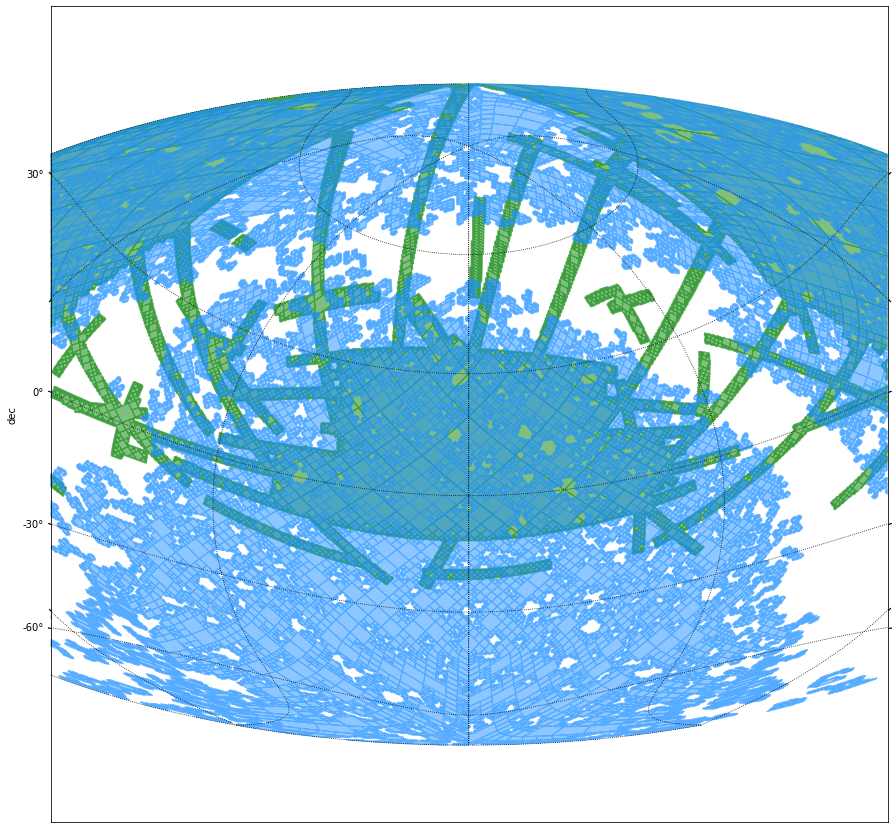

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(111, figsize=(15, 15))

from mocpy import WCS

from astropy.coordinates import Angle
with WCS(fig, 
         fov=200 * u.deg,
         center=SkyCoord(0, 20, unit='deg', frame='icrs'),
         coordsys="icrs",
         rotation=Angle(0, u.degree),
         projection="AIT") as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    %time m1.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    %time m2.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="dodgerblue")

plt.xlabel('ra')
plt.ylabel('dec')
plt.grid(color="black", linestyle="dotted")

We can compute the intersection between the 2 MOC:

CPU times: user 139 ms, sys: 0 ns, total: 139 ms
Wall time: 138 ms


/home/baumann/.local/lib/python3.6/site-packages/astropy_healpix/core.py:592: RuntimeWarning: invalid value encountered in neighbours_nested
  return np.stack(func(healpix_index, nside))


CPU times: user 315 ms, sys: 23.8 ms, total: 339 ms
Wall time: 337 ms


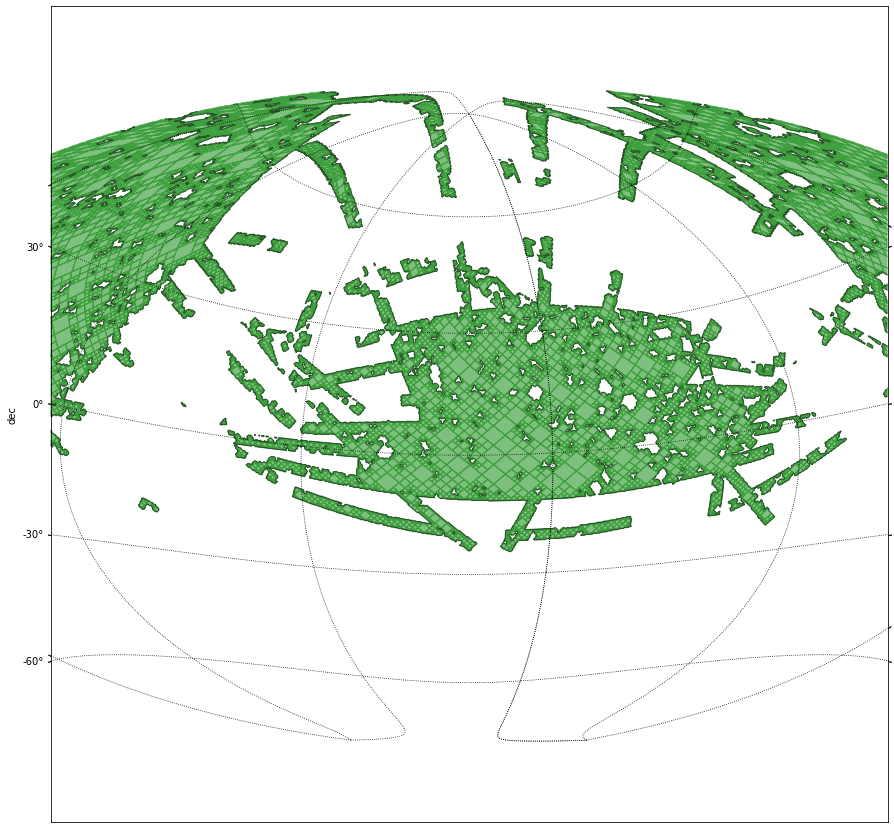

In [5]:
m_intersect = m1.intersection(m2)

import matplotlib.pyplot as plt
fig = plt.figure(111, figsize=(15, 15))

from mocpy import WCS

from astropy.coordinates import Angle
with WCS(fig, 
         fov=200 * u.deg,
         center=SkyCoord(20, 10, unit='deg', frame='icrs'),
         coordsys="icrs",
         rotation=Angle(0, u.degree),
         projection="AIT") as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    %time m_intersect.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    %time m_intersect.border(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="black")

plt.xlabel('ra')
plt.ylabel('dec')
plt.grid(color="black", linestyle="dotted")

And serialize it to FITS (official serialization):

In [8]:
%time hdulist = m_intersect.serialize(format='fits')

CPU times: user 18.1 ms, sys: 520 µs, total: 18.6 ms
Wall time: 19.6 ms


MOC can also be serialized in JSON:
```python
m_intersect.write(format='json')
```

Or write it directly to a FITS/JSON file:
```python
m_intersect.write(path=<filename>, write_to_file=True, format='json'/'fits')
```